## Process the data from the website including sample and cleaning, and build up the network

In [9]:
import pandas as pd
import gzip
import json
from tqdm import tqdm

In [26]:
#read the data of mete.csv
import pandas as pd
import gzip
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/Users/yaojunqin/Downloads/meta_Digital_Music.json.gz')
df = df[['asin', 'price', 'related', 'categories']]
df = df[df['related'].notnull()]

In [7]:
df

,asin,price,related,categories
0,5555991584,9.49,"{'also_bought': ['B000002LRT', 'B000002LRR', '...","[[CDs & Vinyl, New Age, Celtic New Age], [CDs ..."
2,7901622466,11.33,"{'also_bought': ['B00000282A', 'B0084O8O9S', '...","[[CDs & Vinyl, Christian, Rock & Alternative],..."
3,B0000000ZW,23.64,"{'also_bought': ['B00000010Z', 'B0000039Q5', '...","[[CDs & Vinyl, Dance & Electronic], [CDs & Vin..."
4,B00000016W,9.49,"{'also_bought': ['B0025KVLTM', 'B00007FOMP', '...","[[CDs & Vinyl, Classic Rock], [CDs & Vinyl, Po..."
5,B00000016T,14.63,"{'also_bought': ['B000002GWX', 'B000002GXD', '...","[[CDs & Vinyl, Alternative Rock, New Wave & Po..."
6,B0000001BA,9.99,"{'also_bought': ['B0012GN2YW', 'B00004VXG8', '...","[[CDs & Vinyl, Folk, Contemporary Folk], [CDs ..."
7,B00000017R,8.99,"{'also_bought': ['B0000046WB', 'B0000047CX', '...","[[CDs & Vinyl, Jazz, Bebop], [CDs & Vinyl, Jaz..."
8,B0000001BO,8.99,"{'also_viewed': ['B0000WKPGW', 'B0001LYH1G', '...","[[CDs & Vinyl, Jazz, Bebop], [CDs & Vinyl, Jaz..."
9,B0000001O0,14.98,"{'also_bought': ['B005DLBM7Q', 'B00000I41J', '...","[[CDs & Vinyl, Jazz, Bebop], [CDs & Vinyl, Jaz..."
10,B0000001PS,7.92,"{'also_viewed': ['B004EK3L3A', 'B00APFW274'], ...","[[CDs & Vinyl, Jazz, Smooth Jazz], [CDs & Viny..."


In [4]:
#get the keyname in 'related'
l = list(df['related'])
allkey = []
for item in l:
    allkey.extend(item.keys())
allkey = set(allkey)
allkey = list(allkey)

In [5]:
df['also_viewed'] = None
df['bought_together'] = None
df['also_bought'] = None
df['buy_after_viewing'] = None

In [ ]:
#Seperate the relations into four parts
for item in allkey:
    for i in tqdm(range(175962)):
        try:
            df[item].iloc[i] = df['related'].iloc[i][item]
        except:
            pass

  0%|          | 0/175962 [00:00<?, ?it/s]/Users/yaojunqin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
  0%|          | 253/175962 [01:31<18:29:34,  2.64it/s]

In [ ]:
df1.to_csv('Related.csv', index=True, sep=',')

In [4]:
#drop out the data with NAN in "also_bought"
datafile = "Related.csv"
df1 = pd.read_csv(datafile)
df1 = df1[df1['also_bought'].notnull()]
df1 = df1.drop('Unnamed: 0', axis=1)

In [17]:
#save the processed data into csv
df1.to_csv("meta.csv", sep=',')

In [7]:
#get the edges of the whole graph by 'also_bought'
def get_network_edge(df):
    edge_list = []
    for i in tqdm(range(len(df['asin']))):
        a = df['also_bought'].iloc[i].replace("\'","\"")
        also_bought_list = json.loads(a)
        edge_list_1 = []
        for item in also_bought_list:
            edge_list_1.append((df['asin'].iloc[i],item))
        edge_list.extend(edge_list_1)
    return edge_list
        

In [29]:
#get a dictionary of the edges of the whole graph by 'also_bought'
def get_network_edge_dict(df):
    edge_dict = dict()
    for i in tqdm(range(len(df['asin']))):
        a = df['also_bought'].iloc[i].replace("\'","\"")
        also_bought_list = json.loads(a)
        edge_list_1 = []
        for item in also_bought_list:
            edge_list_1.append((df['asin'].iloc[i],item))
        edge_dict[df['asin'].iloc[i]] = edge_list_1
    return edge_dict

In [12]:
#get the relation of a given asin
def get_relation(df, item_asin):
    for i in range(len(df['asin'])):
        if item_asin == df['asin'].iloc[i]:
            index = i
            break
    a = df['also_bought'].iloc[i].replace("\'","\"")
    also_bought_list = json.loads(a)
    return also_bought_list
        
        
    

In [ ]:
edge = get_network_edge(df1)

In [8]:
#save the relation edges as txt
file=open('relation_edge.txt','w')
file.write(str(edge))
file.close()

NameError: name 'edge' is not defined

In [31]:
dict_edge = get_network_edge_dict(df1)

100%|██████████| 165723/165723 [01:28<00:00, 1872.63it/s]


In [18]:
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [13]:
list1= get_relation(df1, 'B00000024J')
edge1 = [('B00000024J', i) for i in list1]
list2= get_relation(df1, 'B00000026I')
edge2 = [('B00000026I', i) for i in list2]
edge_instance = edge1 + edge2

In [23]:
list4 = get_relation(df1, 'B00J4XVQTS')
edge4 = [('B00J4XVQTS', i) for i in list3]
edge4

[('B00J4XVQTS', 'B00LWJDXTI'),
 ('B00J4XVQTS', 'B00L0QWBF0'),
 ('B00J4XVQTS', 'B00IBO21LI'),
 ('B00J4XVQTS', 'B00KHDI35Y'),
 ('B00J4XVQTS', 'B00KHIYD80'),
 ('B00J4XVQTS', 'B00K49SOV4'),
 ('B00J4XVQTS', 'B00ISG3STS'),
 ('B00J4XVQTS', 'B00FYJU49Y'),
 ('B00J4XVQTS', 'B00IXI39MW'),
 ('B00J4XVQTS', 'B003PQFOP2'),
 ('B00J4XVQTS', 'B00JLMDH44'),
 ('B00J4XVQTS', 'B00GBMHOGY'),
 ('B00J4XVQTS', 'B00JYKSP2C'),
 ('B00J4XVQTS', 'B00HVQ7VNK'),
 ('B00J4XVQTS', 'B00K49TBDY'),
 ('B00J4XVQTS', 'B00JNNG2H0'),
 ('B00J4XVQTS', 'B00HVQ7U4U'),
 ('B00J4XVQTS', 'B00JXJA5HM'),
 ('B00J4XVQTS', 'B00IBG3OZI'),
 ('B00J4XVQTS', 'B00I5XN9QG'),
 ('B00J4XVQTS', 'B00KTR43KW'),
 ('B00J4XVQTS', 'B00KAYZ5AQ'),
 ('B00J4XVQTS', 'B00CXVYZ82'),
 ('B00J4XVQTS', 'B00JV2J2LG'),
 ('B00J4XVQTS', 'B00ILZ4OQ2'),
 ('B00J4XVQTS', 'B00JJGJI3Q'),
 ('B00J4XVQTS', 'B00JAPHFKY'),
 ('B00J4XVQTS', 'B00HSGJXK2'),
 ('B00J4XVQTS', 'B00ISG3RLM'),
 ('B00J4XVQTS', 'B00EDLKBY2'),
 ('B00J4XVQTS', 'B00FHFWI5I'),
 ('B00J4XVQTS', 'B00JN0Q8D6'),
 ('B00J4

In [16]:
list3 = get_relation(df1, 'B00000024H')
edge3 = [('B00000024H', i) for i in list3]
edge3                     

[('B00000024H', 'B00LWJDXTI'),
 ('B00000024H', 'B00L0QWBF0'),
 ('B00000024H', 'B00IBO21LI'),
 ('B00000024H', 'B00KHDI35Y'),
 ('B00000024H', 'B00KHIYD80'),
 ('B00000024H', 'B00K49SOV4'),
 ('B00000024H', 'B00ISG3STS'),
 ('B00000024H', 'B00FYJU49Y'),
 ('B00000024H', 'B00IXI39MW'),
 ('B00000024H', 'B003PQFOP2'),
 ('B00000024H', 'B00JLMDH44'),
 ('B00000024H', 'B00GBMHOGY'),
 ('B00000024H', 'B00JYKSP2C'),
 ('B00000024H', 'B00HVQ7VNK'),
 ('B00000024H', 'B00K49TBDY'),
 ('B00000024H', 'B00JNNG2H0'),
 ('B00000024H', 'B00HVQ7U4U'),
 ('B00000024H', 'B00JXJA5HM'),
 ('B00000024H', 'B00IBG3OZI'),
 ('B00000024H', 'B00I5XN9QG'),
 ('B00000024H', 'B00KTR43KW'),
 ('B00000024H', 'B00KAYZ5AQ'),
 ('B00000024H', 'B00CXVYZ82'),
 ('B00000024H', 'B00JV2J2LG'),
 ('B00000024H', 'B00ILZ4OQ2'),
 ('B00000024H', 'B00JJGJI3Q'),
 ('B00000024H', 'B00JAPHFKY'),
 ('B00000024H', 'B00HSGJXK2'),
 ('B00000024H', 'B00ISG3RLM'),
 ('B00000024H', 'B00EDLKBY2'),
 ('B00000024H', 'B00FHFWI5I'),
 ('B00000024H', 'B00JN0Q8D6'),
 ('B0000

In [24]:
edge_instance = edge1 + edge2 +edge3 + edge4

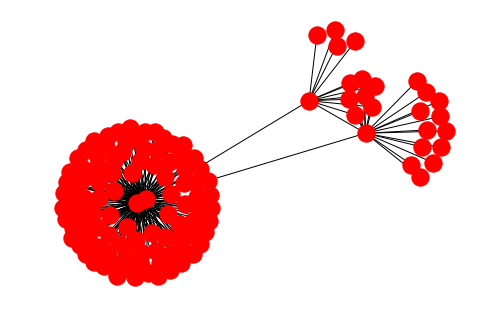

In [25]:
simple_network = nx.Graph()
simple_network.add_edges_from(edge_instance)
nx.draw(simple_network)